In [2]:

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from scipy import signal
from astroquery.mast import Observations
import lightkurve as lk
from astropy.timeseries import LombScargle
from scipy.ndimage import gaussian_filter1d
from scipy.optimize import curve_fit
import astropy.io.fits as fits



In [3]:
plt.style.use('/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle')

def unique(list_of_values):
    unique_values = []
    for _, value in enumerate(list_of_values):
        if value in unique_values:
            pass
        else:
            unique_values.append(value)
    return unique_values

Bad value in file '/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle', line 20 ("mathtext.fallback: dejavsans  # Select fallback font from ['cm' (Computer Modern), 'stix'"): Key mathtext.fallback: dejavsans is not a valid fallback font name. Valid fallback font names are cm,stix,stixsans. Passing 'None' will turn fallback off.
Bad value in file '/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle', line 54 ("axes.prop_cycle: cycler('color', ['#006666', '#669900', '#cc9900', '#b30059', '#6666ff', '#264d73'])"): Key axes.prop_cycle: 'cycler('color', ['' is not a valid cycler construction: EOL while scanning string literal (<unknown>, line 1)


In [4]:
dat_path = '/Users/lib278/Data/TIC_82/asu_999999.dat'

In [5]:
df = pd.read_table(dat_path, sep='|', comment='#', skiprows=[0, 1, 2])  # , dtype=str, names=range(max_n))
df = df[df.index > 1]
df = df[df['LClass'] != 'SUBGIANT']

/var/folders/d1/1tgqc089191cw1n9by3bdp_nm479yx/T/ipykernel_14438/2514707477.py:1: DtypeWarning: Columns (0,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(dat_path, sep='|', comment='#', skiprows=[0, 1, 2])  # , dtype=str, names=range(max_n))


In [6]:
LClasses = unique(df['LClass'].values)
LClasses

['DWARF   ', '        ', 'GIANT   ']

In [7]:
df_Rads = np.array(df['Rad'].values)
df_sRads = np.array(df['s_Rad'].values)

In [8]:
Rads = []
sRads = []

for bep in range(len(df_Rads)):
    try:
        float_Rad = float(df_Rads[bep])
    except:
        continue
    else:
        try:
            float_sRad = float(df_sRads[bep])
        except:
            continue
        else:
            Rads.append(float_Rad)
            sRads.append(float_sRad)

fRads = np.array(sRads)/np.array(Rads)

median:  0.07079646017699115
95th percentile:  0.1615


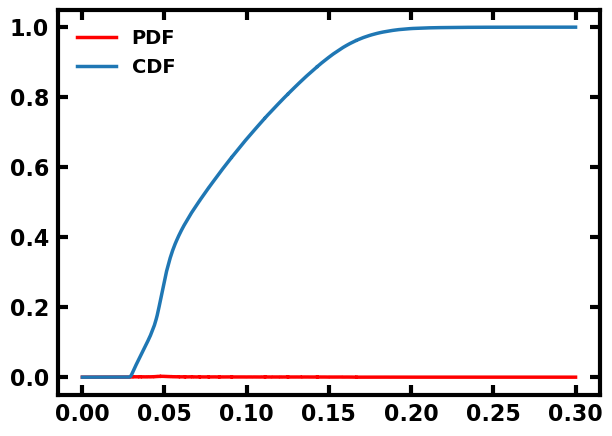

In [17]:
print('median: ', np.median(fRads))


# getting data of the histogram 
bin_width = 0.0001
hist_bins = np.arange(0, 0.25 + bin_width, bin_width)
bin_vals, bin_edges = np.histogram(fRads, bins=hist_bins)
count, bins_count = np.histogram(fRads, bins=hist_bins) 
  
# finding the PDF of the histogram using count values 
pdf = count / sum(count) 
  
# using numpy np.cumsum to calculate the CDF 
# We can also find using the PDF values by looping and adding 
cdf = np.cumsum(pdf) 

print('95th percentile: ', bins_count[1:][np.argwhere(abs(cdf - 0.95) == min(abs(cdf - 0.95)))][0][0])
  
# plotting PDF and CDF 
plt.plot(bins_count[1:], pdf, color="red", label="PDF") 
plt.plot(bins_count[1:], cdf, label="CDF") 
plt.legend() 

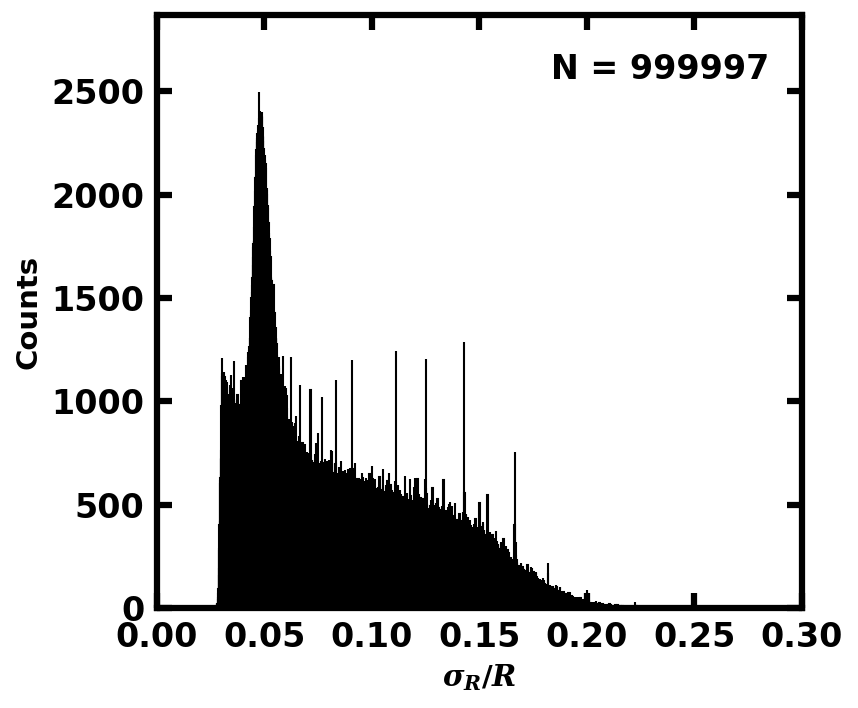

In [18]:
bin_width = 0.0001
hist_bins = np.arange(0, 0.25 + bin_width, bin_width)
bin_vals, bin_edges = np.histogram(fRads, bins=hist_bins)

fig = plt.figure(figsize=(6,5), dpi=150)
ax = fig.add_subplot(111)
ax.set_xlabel(r'$\sigma_{R}$/$R$', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.hist(fRads, edgecolor='black', color='#ccd600', bins=bin_edges)
xmin, xmax = min(hist_bins), max(hist_bins)
ymin, ymax = 0, 1.15*max(bin_vals)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.text(0.95, 0.88, 'N = ' + str(len(fRads)), horizontalalignment='right', verticalalignment='bottom', zorder=2, transform=ax.transAxes)

fig.tight_layout()